In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covida.csv to covida.csv


In [ ]:
df = pd.read_csv("covida.csv")
df.head()

,State/UTs,TotalCases,Active,Discharged,Deaths,ActiveRatio,Discharge Ratio,DeathRatio,Population
0,Andaman and Nicobar,9974,139,9706,129,1.39,97.31,1.29,399001
1,Andhra Pradesh,2312029,24454,2272881,14694,1.06,98.31,0.64,91702478
2,Arunachal Pradesh,63982,695,62993,294,1.09,98.45,0.46,1711947
3,Assam,723416,4730,712085,6601,0.65,98.43,0.91,35998752
4,Bihar,828758,1347,815160,12251,0.16,98.36,1.48,128500364


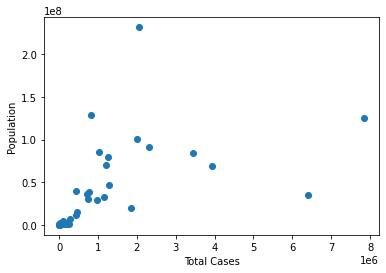

In [ ]:
plt.scatter(df.TotalCases,df.Population)
plt.xlabel('Total Cases')
plt.ylabel('Population')
plt.show()

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['TotalCases','Population']])
y_predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,State/UTs,TotalCases,Active,Discharged,Deaths,ActiveRatio,Discharge Ratio,DeathRatio,Population,cluster
0,Andaman and Nicobar,9974,139,9706,129,1.39,97.31,1.29,399001,0
1,Andhra Pradesh,2312029,24454,2272881,14694,1.06,98.31,0.64,91702478,1
2,Arunachal Pradesh,63982,695,62993,294,1.09,98.45,0.46,1711947,0
3,Assam,723416,4730,712085,6601,0.65,98.43,0.91,35998752,0
4,Bihar,828758,1347,815160,12251,0.16,98.36,1.48,128500364,1


In [ ]:
km.cluster_centers_

array([[6.43245115e+05, 1.40061997e+07],
       [2.65003411e+06, 9.26895678e+07],
       [2.05674100e+06, 2.31502578e+08]])

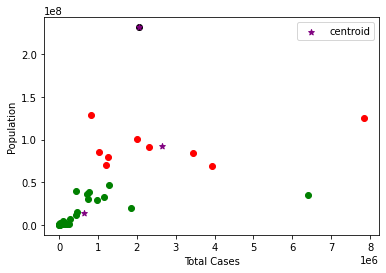

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.TotalCases,df1.Population,color='green')
plt.scatter(df2.TotalCases,df2.Population,color='red')
plt.scatter(df3.TotalCases,df3.Population,color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Total Cases')
plt.ylabel('Population')
plt.legend()

Preprocessing using Min Max Scaler

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Population']])
df['Population'] = scaler.transform(df[['Population']])

scaler.fit(df[['TotalCases']])
df['TotalCases'] = scaler.transform(df[['TotalCases']])
df.head()

,State/UTs,TotalCases,Active,Discharged,Deaths,ActiveRatio,Discharge Ratio,DeathRatio,Population,cluster
0,Andaman and Nicobar,0.000000,139,9706,129,1.39,97.31,1.29,0.001439,0
1,Andhra Pradesh,0.294024,24454,2272881,14694,1.06,98.31,0.64,0.395946,1
2,Arunachal Pradesh,0.006898,695,62993,294,1.09,98.45,0.46,0.007112,0
3,Assam,0.091123,4730,712085,6601,0.65,98.43,0.91,0.155260,0
4,Bihar,0.104577,1347,815160,12251,0.16,98.36,1.48,0.554944,1


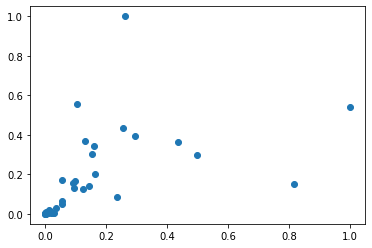

In [ ]:
plt.scatter(df.TotalCases,df.Population)

In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['TotalCases','Population']])
y_predicted

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2], dtype=int32)

In [ ]:
df['cluster']=y_predicted
df.head()

,State/UTs,TotalCases,Active,Discharged,Deaths,ActiveRatio,Discharge Ratio,DeathRatio,Population,cluster
0,Andaman and Nicobar,0.000000,139,9706,129,1.39,97.31,1.29,0.001439,1
1,Andhra Pradesh,0.294024,24454,2272881,14694,1.06,98.31,0.64,0.395946,2
2,Arunachal Pradesh,0.006898,695,62993,294,1.09,98.45,0.46,0.007112,1
3,Assam,0.091123,4730,712085,6601,0.65,98.43,0.91,0.155260,1
4,Bihar,0.104577,1347,815160,12251,0.16,98.36,1.48,0.554944,2


In [ ]:
km.cluster_centers_

array([[0.90783543, 0.34452407],
       [0.05149147, 0.05665695],
       [0.25513048, 0.45138866]])

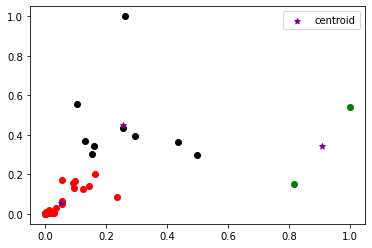

In [ ]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.TotalCases,df1.Population,color='green')
plt.scatter(df2.TotalCases,df2.Population,color='red')
plt.scatter(df3.TotalCases,df3.Population,color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Elbow Plot to find K value

In [ ]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['TotalCases','Population']])
    sse.append(km.inertia_)

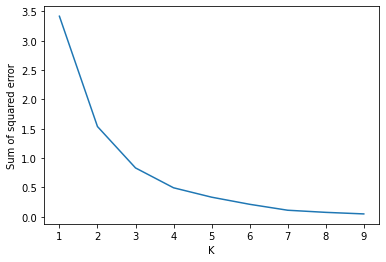

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)